# 다층 퍼셉트론 (Multi-Layer Perceptron : MLP) 
### with MNIST Dataset

 - 학습 목표 )
     MNIST Dataset을 MLP에 적합한 형태로 변형하여 학습
     
 ### (MNIST Dataset)
 
  인공신경망을 학습할 때 흔히 사용되는 toy dataset; 사람이 직접 손으로 쓴 숫자 0~9를 
  이미지화 한 데이터이다.

## MNIST Dataset 불러오기

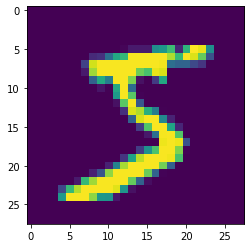

label :  5


In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0])
plt.show()
print('label : ', y_train[0])

## Dataset Pre-Processing

MNIST Dataset은 흑백 이미지의 28x28의 2차원 행렬 형태를 가지고있다. 하지만 MLP의 
Input layer에 2차원 행렬은 적절한 형태가 아니기 때문에 이를 1차원 형태로 재배열
(reshape)하는 과정이 소요된다.

In [2]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# 학습데이터의 1/3만 활용
x_train, _, y_train, _ = train_test_split(
    x_train, 
    y_train, 
    test_size = 0.67, 
    random_state = 7
)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


## Model 학습 및 평가

In [3]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

model = Sequential()

# input layer
model.add(Dense(50, input_shape = (784, ), activation = 'sigmoid'))

# hidden layer (first)
model.add(Dense(50, activation = 'sigmoid'))

# hidden layer (second)
model.add(Dense(50, activation = 'sigmoid'))

# hidden layer (third)
model.add(Dense(50, activation = 'sigmoid'))

# output layer
model.add(Dense(10, activation = 'softmax'))

sgd = optimizers.SGD(lr = 0.001)
model.compile(
    optimizer = sgd, 
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    batch_size = 256,
    validation_split = 0.3,
    epochs = 100,
    verbose = 0
)

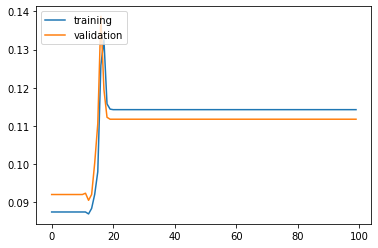

In [4]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

## Model 평가

In [5]:
result = model.evaluate(x_test, y_test)
print("test accuracy", result[1])

313/313 [==============================] - 0s 512us/step - loss: 2.2993 - accuracy: 0.1135
test accuracy 0.11349999904632568


# Improving techniques

    1. 가중치 초기화; Weight Initialization
    2. 활성 함수; Activation Function
    3. 최적화; Optimization


## 1.  Weight Initialization

케라스의 default 가중치 초기화 방식은 일정 구간 내에서 랜덤하게 찍는 Random_Uniform
방식이다. 이는 back propagation 과정에서 gradient가 지나치게 커지거나 소실(exploding/vanishing gradient)문제로 이어질 위험성이 크기 때문에 좀 더 개선된 초기화
방식들을 제공하고있다. 케라스에서 제공하는 방식 중 흔히 사용되는 것은

 - LeCun(lecun_uniform, lecun_normal)
 - Xavier(glorot_uniform, glorot_normal)
 - He(he_uniform, he_normal)
 
 과 같은 방식들이 존재한다.
 
## He Initialization을 사용한 Model 생성 및 학습

In [13]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

# Model 생성 함수

def mlp_model():
    model = Sequential()
    
    # input layer
    model.add(Dense(
        50, input_shape = (784, ),
        kernel_initializer = 'he_normal',
        activation = 'sigmoid'
    ))
    
    # hidden layer : 1 
    model.add(Dense(
        50,
        kernel_initializer = 'he_normal',
        activation = 'sigmoid'
    ))
    
    # hidden layer : 2
    model.add(Dense(
        50,
        kernel_initializer = 'he_normal',
        activation = 'sigmoid'
    ))
    
    # hidden layer : 3
    model.add(Dense(
        50,
        kernel_initializer = 'he_normal',
        activation = 'sigmoid'
    ))
    
    # outpuy layer
    model.add(Dense(
        10,
        kernel_initializer = 'he_normal',
        activation = 'softmax'
    ))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(
        optimizer = sgd,
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )
    
    return model

In [15]:
better_model = mlp_model()
history = better_model.fit(
    x_train, 
    y_train, 
    validation_split = 0.3, 
    epochs = 100, 
    verbose = 0
)

## 결과를 통해 성능향상 확인하기

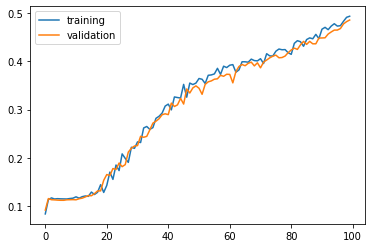

313/313 [==============================] - 0s 567us/step - loss: 1.7859 - accuracy: 0.4833
test accuracy 0.48330000042915344


In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

result = better_model.evaluate(x_test, y_test)
print("test accuracy", result[1])

In [19]:
## 2.활성 함수

